In [1]:
import pandas as pd
import numpy as np
# prepare the pipeline
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
#from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
# fit model on training data

#from sklearn.externals import joblib
import joblib

In [2]:
path='C:\\Users\\oodeyemi\\Desktop\\Peng_code\\DL_features_v3_Qi_unrolled\\'

traindf = pd.read_csv(path+ 'train_DL_features.csv')
valdf = pd.read_csv(path+ 'val_DL_features.csv')
testdf = pd.read_csv(path+ 'test_DL_features.csv')

In [3]:
#list(traindf.columns)

testdf.shape

(18816, 328)

train = traindf.filter(regex='DL_F|GI|Conc|anti|strains')
val = valdf.filter(regex='DL_F|GI|Conc|anti|strains')
test = testdf.filter(regex='DL_F|GI|Conc|anti|strains')

In [4]:
train = traindf.query("anti == 'CFPM' & strains == 'K.PNEUMONIAE'")
val = valdf.query("anti == 'CFPM' & strains == 'K.PNEUMONIAE'")
test = testdf.query("anti == 'CFPM' & strains == 'K.PNEUMONIAE'")

In [5]:
#test.columns
train.shape
val.shape
test.shape

(224, 328)

In [6]:
#print(train.columns)
train= train.filter(regex='DL_F|GI|Conc')
val = val.filter(regex='DL_F|GI|Conc')
test = test.filter(regex='DL_F|GI|Conc')

In [ ]:
train.sample(frac = 1)

In [7]:
X_train = train.drop('GI', axis=1)
y_train = train['GI']
 

X_val = val.drop('GI',axis = 1)
y_val = val['GI']

X_test = test.drop('GI',axis = 1)
y_test = test['GI']

In [ ]:
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

In [8]:

pipe = make_pipeline(StandardScaler(),XGBClassifier(max_depth=5, n_estimators=310, learning_rate=0.01)) #StandardScaler(),max_depth=5, n_estimators=310, learning_rate=0.01
pipe.fit(X_train,y_train)
joblib.dump(pipe, 'model.pkl')

['model.pkl']

In [9]:
y_train_pred = pipe.predict(X_train)
predix_train = [round(value) for value in y_train_pred]
# evaluate predictions
accuracy = accuracy_score(y_train, predix_train)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 99.50%


              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00       274
         1.0       1.00      0.98      0.99       126

    accuracy                           0.99       400
   macro avg       1.00      0.99      0.99       400
weighted avg       1.00      0.99      0.99       400



<AxesSubplot:>

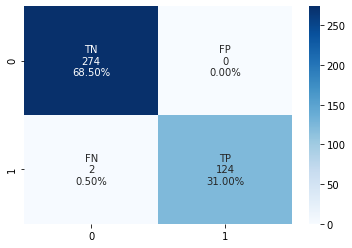

In [10]:
from sklearn.metrics import classification_report
print(classification_report(y_train, y_train_pred))

import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train, y_train_pred)
cm

group_names = ['TN','FP','FN','TP']
group_counts = ['{0:0.0f}'.format(value) for value in
                cm.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

In [11]:
train['GI_pred'] = y_train_pred
train.columns

Index(['Concentration', 'GI', 'DL_Features0_0', 'DL_Features0_1',
       'DL_Features0_2', 'DL_Features0_3', 'DL_Features0_4', 'DL_Features0_5',
       'DL_Features0_6', 'DL_Features0_7',
       ...
       'DL_Features1_119', 'DL_Features1_120', 'DL_Features1_121',
       'DL_Features1_122', 'DL_Features1_123', 'DL_Features1_124',
       'DL_Features1_125', 'DL_Features1_126', 'DL_Features1_127', 'GI_pred'],
      dtype='object', length=259)

In [12]:
#Loading the saved model with joblib
pipe = joblib.load('model.pkl')

# New data to predict
X_val 
y_val 

y_val_pred = pipe.predict(X_val)
predix_val = [round(value) for value in y_val_pred]
# evaluate predictions
accuracy = accuracy_score(y_val, predix_val)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 90.28%


In [ ]:
val.columns
val['GI_pred'] = y_val_pred
val.columns

valdf.columns
valdf['GI_pred'] = y_val_pred
valdf.columns

<AxesSubplot:>

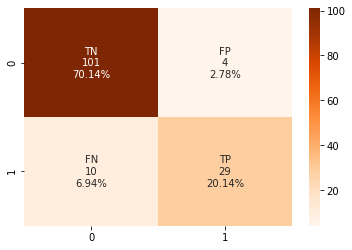

In [13]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_val, y_val_pred)
cm

group_names = ['TN','FP','FN','TP']
group_counts = ['{0:0.0f}'.format(value) for value in
                cm.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='Oranges')

In [14]:
from sklearn.metrics import classification_report
print(classification_report(y_val, y_val_pred))

              precision    recall  f1-score   support

         0.0       0.91      0.96      0.94       105
         1.0       0.88      0.74      0.81        39

    accuracy                           0.90       144
   macro avg       0.89      0.85      0.87       144
weighted avg       0.90      0.90      0.90       144



In [15]:
y_test_pred = pipe.predict(X_test)
y_test_pred

predix_test = [round(value) for value in y_test_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predix_test)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 84.82%


In [16]:

test["GI_pred"] = y_test_pred
test.columns

Index(['Concentration', 'GI', 'DL_Features0_0', 'DL_Features0_1',
       'DL_Features0_2', 'DL_Features0_3', 'DL_Features0_4', 'DL_Features0_5',
       'DL_Features0_6', 'DL_Features0_7',
       ...
       'DL_Features1_119', 'DL_Features1_120', 'DL_Features1_121',
       'DL_Features1_122', 'DL_Features1_123', 'DL_Features1_124',
       'DL_Features1_125', 'DL_Features1_126', 'DL_Features1_127', 'GI_pred'],
      dtype='object', length=259)

<AxesSubplot:>

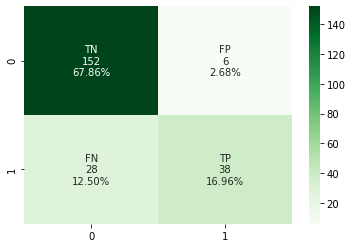

In [17]:
cm = confusion_matrix(y_test, y_test_pred)
cm

group_names = ['TN','FP','FN','TP']
group_counts = ['{0:0.0f}'.format(value) for value in
                cm.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='Greens')

In [18]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

         0.0       0.84      0.96      0.90       158
         1.0       0.86      0.58      0.69        66

    accuracy                           0.85       224
   macro avg       0.85      0.77      0.80       224
weighted avg       0.85      0.85      0.84       224



In [ ]:
myclf = pipe

In [ ]:
!pip install FeatureImportance

In [ ]:
features  = X_train.columns
features

# AA and EA calculation

In [ ]:
growthThresh = 0.5

In [ ]:
!pip install opencv-python

In [ ]:
import pip
pip.main(['install','xlsxwriter'])

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from glob import glob

import csv
import xlsxwriter
#from tabulate import tabulate
import pandas as pd
from pprint import pprint

import seaborn as sn
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc, RocCurveDisplay

from AST_Infer_Utils import *

In [ ]:
#import os 
#os.getcwd()
os.chdir('C:\\Users\\oodeyemi\\Desktop\\Peng_code\\DL_features_v3\\DL_features_v3\\')

In [ ]:
list(testdf.columns)

In [ ]:
valdf.columns

In [ ]:
resetInferDataDict()
yTruthAll = np.array([])
yPredAll = np.array([])
infoListAll=np.array([])


# test_df is the inout set, I used my test set here, you can use any alternative set

for index, row in testdf.iterrows():
   # numFeatures = row[features]
    yTruth = row['GI']
    infoList = ['', 0, row['strains'], row['SampleID'], row['anti'], row['Concentration'], '0']

#    print(row['strain'])


    yPred = row['GI_pred']
    infoList = [infoList]
    
    yTruth = np.array(yTruth).reshape(1,1)
    yPred = np.array(yPred).reshape(1,1)

    
    
    if yTruthAll.size!=0:
        yTruthAll=np.concatenate([yTruthAll, yTruth], axis=0)
    else:
        yTruthAll=yTruth
    if yPredAll.size!=0:
        yPredAll=np.concatenate([yPredAll, yPred], axis=0)
    else:
        yPredAll=yPred
        
    if infoListAll.size!=0:
        infoListAll=np.concatenate([infoListAll, infoList], axis=0)
    else:
        infoListAll=np.array(infoList)

    addInferData(infoList, yTruth, yPred)
    
    
    
# not needed, this will be done in a later section
#groupCount, accAACount, accEACount, undetCount, strainSet, drugSet = compileAllInferData(growthThresh)


In [ ]:
# please find file "GramNeg_FullSample.csv" in the email I sent

csvFileName = 'GramNeg_FullSample.csv'
# csvFileName = 'GramPos/GramPos_FullSample.csv'

dataDict = []
indMap = {}


with open(csvFileName, 'r') as csvFile:
    csvReader = csv.DictReader(csvFile)
    
    for n, line in enumerate(csvReader):            
        dataDict.append(line)
        indMap[int(line['Index'])] = n
        
dataDict[0]['data_type'] = ''
dataDict[0]['GI_pred'] = ''
        
print('totally %d valid examples' %len(dataDict))

In [ ]:
# set your local path here, where your EA results is going to be stored 

dataPath = 'C:\\Users\\oodeyemi\\Desktop\\Peng_code\\DL_features_v3\\DL_features_v3\\'

predCSVFileName = dataPath + 'GramNeg_Predict.csv'

with open(predCSVFileName, 'w') as csvFile:
    sampleLine = dataDict[0]
    csvWriter = csv.DictWriter(csvFile, sampleLine.keys())
    csvWriter.writeheader()
    
    for line in dataDict:
        csvWriter.writerow(line)

In [ ]:
predXLSXFileName = dataPath + 'GramNeg_Predict.xlsx'
workBook = xlsxwriter.Workbook(predXLSXFileName, {'strings_to_numbers': True, 'nan_inf_to_errors': True})

workSheet = workBook.add_worksheet('sample prediction')

workSheet.write_row(0, 0, dataDict[0].keys())
for n, row in enumerate(dataDict):
    workSheet.write_row(n+1, 0, row.values())

In [ ]:
groupCount, accAACount, accEACount, undetCount, strainSet, drugSet = compileAllInferData(growthThresh)

groupCount = np.pad(groupCount, ((0,1),(0,1)), 'constant')
accAACount = np.pad(accAACount, ((0,1),(0,1)), 'constant')
accEACount = np.pad(accEACount, ((0,1),(0,1)), 'constant')
undetCount = np.pad(undetCount, ((0,1),(0,1)), 'constant')

In [ ]:
strainSet

In [ ]:
yPredBinaryAll = (yPredAll > growthThresh)

sampCount = np.zeros((25, 25))
errCount = np.zeros((25, 25))

bias0Cent = 10
sampCountByBias = np.zeros(bias0Cent*2 + 1)
errCountByBias = np.zeros(bias0Cent*2 + 1)

for (yt, yp, info) in zip(yTruthAll, yPredBinaryAll, infoListAll):
    
    if info[4] not in drugSet:
        drugSet.append(info[4])

    colInd = drugSet.index(info[4])

    if info[2] not in strainSet:
        strainSet.append(info[2])

    rowInd = strainSet.index(info[2])
    
#   wellBias = int(info[6])
#   biasInd = wellBias + bias0Cent

    sampCount[rowInd, colInd] += 1
#    sampCountByBias[biasInd] += 1

    if yp != yt:   
        errCount[rowInd, colInd] += 1    
#        errCountByBias[biasInd] += 1
    
sampCount = sampCount[0:len(strainSet)+1, 0:len(drugSet)+1]
errCount = errCount[0:len(strainSet)+1, 0:len(drugSet)+1]

#biasEff = np.where(sampCountByBias > 0)
#biasLow = np.min(biasEff)
#biasHigh = np.max(biasEff)+1
#biasRange = np.arange(biasLow-bias0Cent, biasHigh-bias0Cent)
#bias0Cent -= biasLow
#sampCountByBias = sampCountByBias[biasLow:biasHigh]
#errCountByBias = errCountByBias[biasLow:biasHigh]

In [ ]:
strainSet

In [ ]:
sampCount[:,-1] = np.sum(sampCount, axis=1)
sampCount[-1,:] = np.sum(sampCount, axis=0)
errCount[:,-1] = np.sum(errCount, axis=1)
errCount[-1,:] = np.sum(errCount, axis=0)
groupCount[:,-1] = np.sum(groupCount, axis=1)
groupCount[-1,:] = np.sum(groupCount, axis=0)
accAACount[:,-1] = np.sum(accAACount, axis=1)
accAACount[-1,:] = np.sum(accAACount, axis=0)
accEACount[:,-1] = np.sum(accEACount, axis=1)
accEACount[-1,:] = np.sum(accEACount, axis=0)
undetCount[:,-1] = np.sum(undetCount, axis=1)
undetCount[-1,:] = np.sum(undetCount, axis=0)

pip install tabulate

In [ ]:

from tabulate import tabulate

In [ ]:
tableHeader = list([''] + drugSet)
tableDataCount = []
tableDataGroupCount = []
tableDataAcc = []
tableDataAccAA = []
tableDataAccEA = []
tableDataUndet = []

sampCount = sampCount.astype(int)
groupCount = groupCount.astype(int)
accRate = np.round((1 - errCount / sampCount) * 100, decimals=1)
accAARate = np.round((accAACount / groupCount) * 100, decimals=1)
accEARate = np.round((accEACount / groupCount) * 100, decimals=1)

for n, strain in enumerate(strainSet):
    tableDataCount.append([strainSet[n][0:6]] + list(sampCount[n]))
    tableDataGroupCount.append([strainSet[n][0:6]] + list(groupCount[n]))
    tableDataAcc.append([strainSet[n][0:6]] + list(accRate[n]))
    tableDataAccAA.append([strainSet[n][0:6]] + list(accAARate[n]))
    tableDataAccEA.append([strainSet[n][0:6]] + list(accEARate[n]))
    tableDataUndet.append([strainSet[n][0:6]] + list(undetCount[n]))

tableDataCount.append(['SUM'] + list(sampCount[-1,:]))
tableDataGroupCount.append(['SUM'] + list(groupCount[-1,:]))
tableDataAcc.append(['MEAN'] + list(accRate[-1,:]))
tableDataAccAA.append(['MEAN'] + list(accAARate[-1,:]))
tableDataAccEA.append(['MEAN'] + list(accEARate[-1,:]))
tableDataUndet.append(['SUM'] + list(undetCount[-1,:]))

sampCountTable = tabulate(tableDataCount, headers=tableHeader+['SUM'], tablefmt="pretty")
groupCountTable = tabulate(tableDataGroupCount, headers=tableHeader+['SUM'], tablefmt="pretty")
accRateTable = tabulate(tableDataAcc, headers=tableHeader+['MEAN'], tablefmt="pretty", floatfmt=".1f")
accAARateTable = tabulate(tableDataAccAA, headers=tableHeader+['MEAN'], tablefmt="pretty", floatfmt=".1f")
accEARateTable = tabulate(tableDataAccEA, headers=tableHeader+['MEAN'], tablefmt="pretty", floatfmt=".1f")
undetCountTable = tabulate(tableDataUndet, headers=tableHeader+['SUM'], tablefmt="pretty")

print('example count by species & drug groups')
print(sampCountTable)
print()
print('dilution group count by species & drug groups')
print(groupCountTable)
print()
print('G/I accuracy in % by species & drug groups')
print(accRateTable)
print()
print('AA accuracy in % by species & drug groups')
print(accAARateTable)
print()
print('EA accuracy in % by species & drug groups')
print(accEARateTable)
print()
print('undeter in % by species & drug groups')
print(undetCountTable)

# plt.figure(figsize=(12,8))
# sn.heatmap(accRate, annot=True, square=False)
# plt.title('accuracy in % by species & drug groups')

In [ ]:
workSheet = workBook.add_worksheet('sample count by group')

workSheet.write_row(0, 0, tableHeader+['SUM'])
for n, row in enumerate(tableDataCount):
    workSheet.write_row(n+1, 0, row)

workSheet.write_row(n+4, 0, ['drugs:']+drugSet)
workSheet.write_row(n+5, 0, ['species:']+strainSet)

workSheet = workBook.add_worksheet('dilution group count by group')

workSheet.write_row(0, 0, tableHeader+['SUM'])
for n, row in enumerate(tableDataGroupCount):
    workSheet.write_row(n+1, 0, row)

workSheet.write_row(n+4, 0, ['drugs:']+drugSet)
workSheet.write_row(n+5, 0, ['species:']+strainSet)

workSheet = workBook.add_worksheet('accuracy by group')

workSheet.write_row(0, 0, tableHeader+['MEAN'])
for n, row in enumerate(tableDataAcc):
    workSheet.write_row(n+1, 0, row)
    
workSheet.write_row(n+4, 0, ['drugs:']+drugSet)
workSheet.write_row(n+5, 0, ['species:']+strainSet)

workSheet = workBook.add_worksheet('AA accuracy by group')

workSheet.write_row(0, 0, tableHeader+['MEAN'])
for n, row in enumerate(tableDataAccAA):
    workSheet.write_row(n+1, 0, row)
    
workSheet.write_row(n+4, 0, ['drugs:']+drugSet)
workSheet.write_row(n+5, 0, ['species:']+strainSet)

workSheet = workBook.add_worksheet('EA accuracy by group')

workSheet.write_row(0, 0, tableHeader+['MEAN'])
for n, row in enumerate(tableDataAccEA):
    workSheet.write_row(n+1, 0, row)
    
workSheet.write_row(n+4, 0, ['drugs:']+drugSet)
workSheet.write_row(n+5, 0, ['species:']+strainSet)

workSheet = workBook.add_worksheet('undertermined count by group')

workSheet.write_row(0, 0, tableHeader+['SUM'])
for n, row in enumerate(tableDataUndet):
    workSheet.write_row(n+1, 0, row)

workSheet.write_row(n+4, 0, ['drugs:']+drugSet)
workSheet.write_row(n+5, 0, ['species:']+strainSet)

workBook.close()